<font size=8> F-I curve test

In [16]:
#Common Python Packages
from pickle import TRUE
import time
import sys
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + '/..')

#dynapse2 spikegen imports
from lib.dynapse2_util import *
from lib.dynapse2_network import Network
from lib.dynapse2_spikegen import send_events,get_fpga_time, send_virtual_events, poisson_gen, isi_gen,regular_gen
from lib.dynapse2_raster import *
from lib.dynapse2_obj import *

#Statistics imports
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression

#my imports
from configs.neuron_configs import neuron_configs
from adaptation import pc_single,ff,pc_pv_sst
from adaptation_lib.spike_stats import *
from adaptation_lib.dynapse_setup import *
from adaptation_lib.graphing import *
from adaptation_lib.tc_extraction import *


In [20]:
[board,profile_path,number_of_chips]=obtain_board()

TypeError: Unable to convert function return value to a Python type! The signature was
	(arg0: samna.device.DeviceInfo) -> Union[samna.dynapcnnDevKit.DynapcnnDevKit, samna.dvs128Testboard.Dvs128Testboard, samna.xyloTestBoard.XyloTestBoard, samna.xyloDevKit.XyloDevKit, dynapse1::Dynapse1Model, samna.camera.inivation.Davis, samna.camera.inivation.DvXplorer, samna.camera.psee.Camera, samna.speck2TestBoard.Speck2TestBoard, speck2bTestboard::Speck2bTestboard, samna.xyloAudioTestBoard.XyloAudioTestBoard, samna.xyloA2TestBoard.XyloA2TestBoard, samna.speck2bDevKit.Speck2bDevKit, samna.speck2bDevKitTiny.Speck2bDevKitTiny, samna.speck2cMiniTestBoard.Speck2cMiniTestBoard, speck2bMiniTestboard::Speck2bMiniTestboard, samna.speck2dMiniTestBoard.Speck2dMiniTestBoard, samna.speck2eTestBoard.Speck2eTestBoard, samna.dvsSynsTestBoard.DvsSynsTestBoard, samna.spiTestBoard.SpiTestBoard, dynapse2::Dynapse2Stack, dynapse2::Dynapse2DevBoard, emptyBoard::EmptyBoard, motherBoardV0::MotherBoardV0, motherBoardV1::MotherBoardV1]

In [11]:
neuron_config=neuron_configs()

neuron_config['PC_W1']=[3,100]#recurrent PC to PC
neuron_config['PC_W2']=[1,150]#PV shunt inhibition to PC
neuron_config['PC_W3']=[5,50]#SST gaba inhibition to PC

neuron_config['PV_W1']=[1,200]#PC_input
neuron_config['PV_W2']=[3,100]#PV gaba inhibition to PV
neuron_config['PV_W3']=[5,50]#SST gaba inhibition to PV

neuron_config['SST_W1']=[3,220]#PC input
neuron_config['SST_W2']=[1,50]#PV shunt inhibition to SST


neuron_config['nvn']=10
neuron_config['pcn']=160
neuron_config['pvn']=20
neuron_config['sstn']=20

neuron_config['Input_PC']=.1
neuron_config['Input_SST']=.01
neuron_config['Input_PV']=.01
neuron_config['PC_PC']=.3
neuron_config['PC_PV']=.2
neuron_config['PC_SST']=.05
neuron_config['PV_PC']=.5
neuron_config['PV_PV']=.2
neuron_config['PV_SST']=.2
neuron_config['SST_PC']=.6
neuron_config['SST_PV']=.2

neuron_config['adaptation']=False
neuron_config['duration']=2
neuron_config['input_type']='Regular'
neuron_config['in_freq']=60



[output_events,test_config]=pc_pv_sst.pc_pv_sst(board=board, profile_path=profile_path, number_of_chips=number_of_chips,neuron_config=neuron_config)

data_path='/home/hector/Documents/dynapse-se2-data/general_tests/'
np.save(data_path+'Network.npy',output_events)

Setting Latches


PC_CV_average: 0.47 PV_CV_average: 1.04 SST_CV_average: 0.63
PC_synchrony: 0.55 PV_CV_average: 0.44 SST_CV_average: 0.31


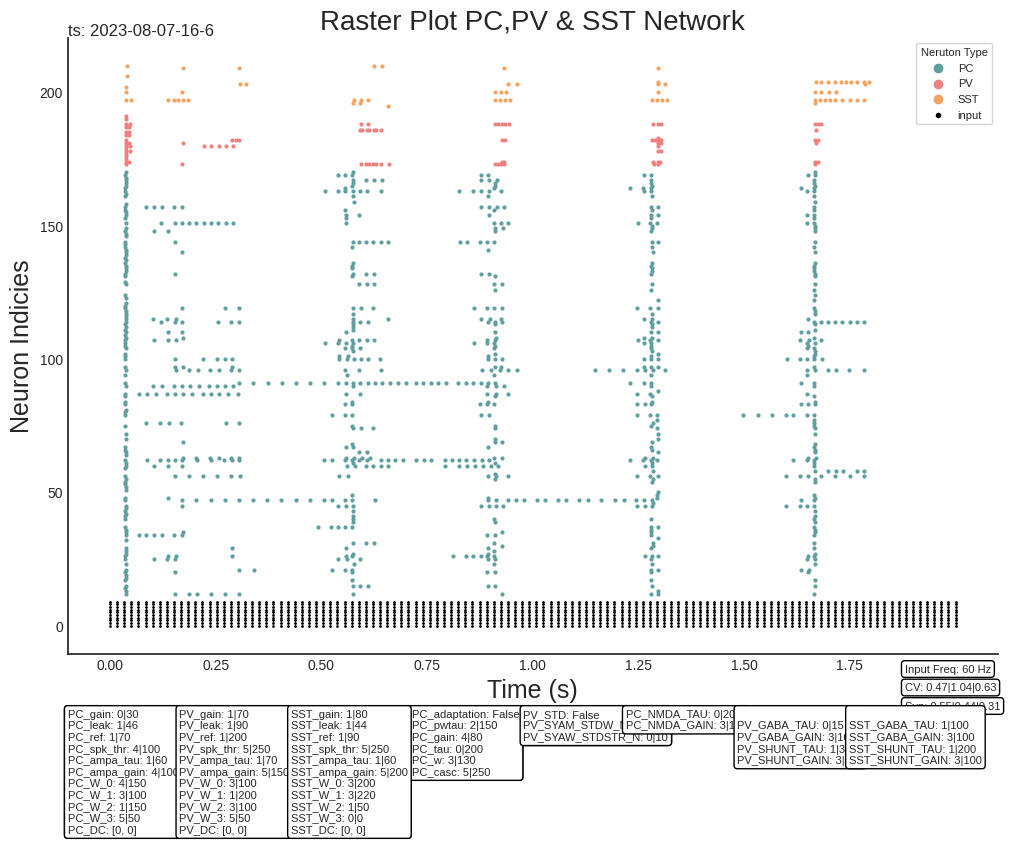

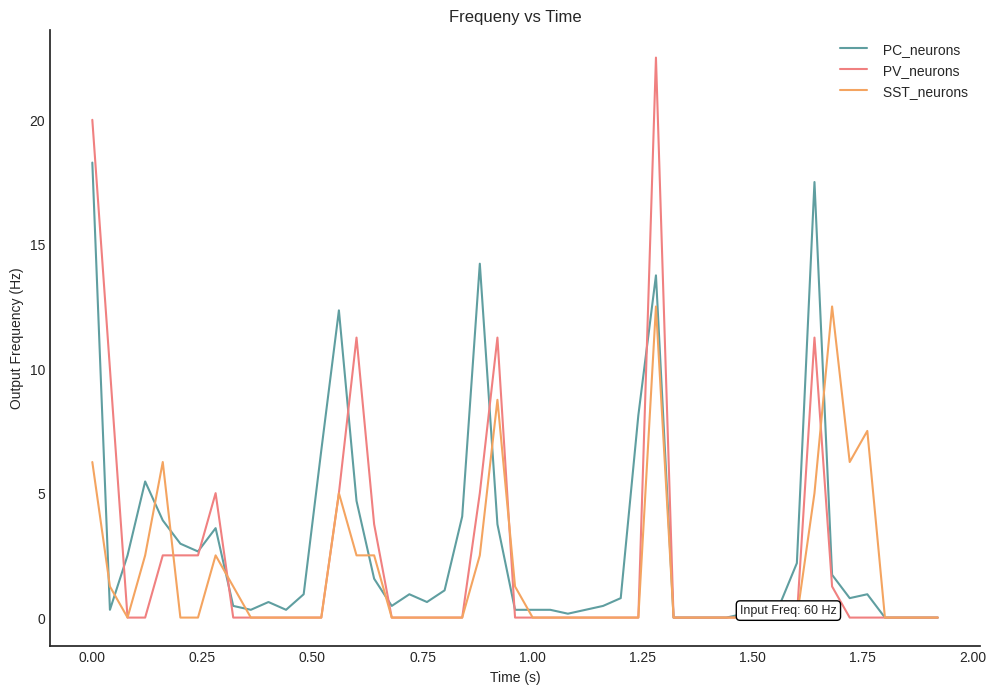

In [ ]:

# Load your data
#data_path='/home/hector/Documents/dynapse-se2-data/time_constant_tests/'
#output_events = np.load(data_path+'Network.npy', allow_pickle=True)

[cv_values,synchrony_values]=run_dynamic_anal(output_events,test_config)
script_annotated_raster_plot(test_config,output_events,neuron_config,cv_values=cv_values,syn_values=synchrony_values,save=True,show=True,annotate=True,annotate_network=True)
frequency_vs_time_plot(frequency_over_time(test_config,output_events),test_config,save=True,annotate=False,show=True)
